In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from file import save_file
from statistics import mean
from datetime import date
import file
from yfetch import get_stock_history

In [14]:
symbol = 'TQQQ'

history = get_stock_history(symbol, period='5y', interval='1wk')
# history.index = history.index.date
# display(history)

Loaded cached history for TQQQ (261 rows)


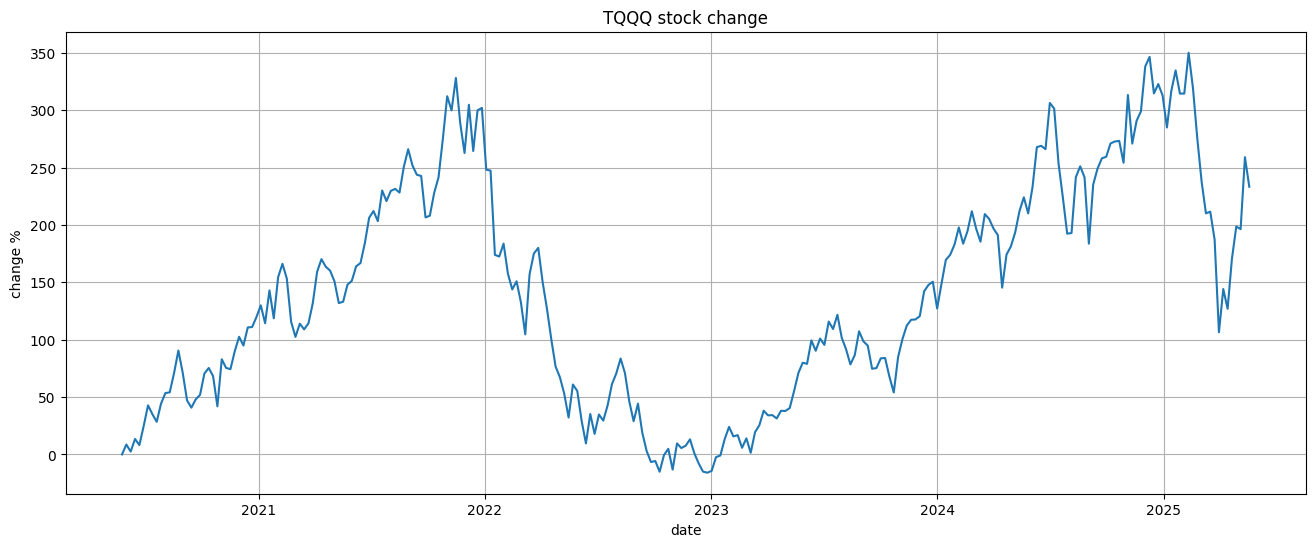

In [16]:
plt.figure(figsize=(16,6))
plt.plot((history.Close / history.Close.iloc[0]) * 100 - 100)
plt.title(symbol + ' stock change')
plt.xlabel('date')
plt.ylabel('change %')
plt.grid()
plt.show()

In [26]:
gap = (0.5 / 80) * 100 # %
option_prices = {
    1: [56/1.42, 57/1.23, 59/1.54, 83/1.96, 84/1.82, 87/2.38, 90/1.77, 67/2.16],
    2: [56/2, 57/2.03, 59/2.34, 83/3.05, 84/3.10, 87/3.4, 90/3.2, 67/3.3],
    3: [56/2.53, 57/2.68, 59/2.71, 83/3.75, 84/3.97, 87/4.1, 90/4.02, 67/4.07],
    4: [52/3.22, 56/3.1, 57/2.98, 59/3.15, 83/4.65, 84/4.59, 87/4.55, 90/4.65, 67/4.67],
    5: [56/3.42, 57/3.08, 59/3.31, 83/4.45, 84/4.70, 87/5.27, 90/5.4, 67/5.12],
    6: [56/3.47, 57/3.7, 59/3.9, 83/5.9, 84/5.65, 87/5.87, 90/5.52, 67/6.65],
    7: [57/4.15, 59/3.43, 83/6.0, 90/5.97],
    8: [56/4.4, 87/6.9, 67/6.5],
    9: [52/4.87, 84/6.85],
    11: [83/8.25],
    17: [67/9.87],
    18: [90/10.97],
    19: [59/7.37],
    20: [57/7.37],
    21: [56/7.3, 87/12.07],
    22: [52/7.65, 84/11.50],
    24: [83/12.52],
    30: [67/13.50],
    31: [90/14.82],
    32: [59/10.23],
    33: [57/10.02],
    34: [56/9.95, 87/15.77, 67/14.20],
    35: [52/9.98, 84/14.00],
    36: [59/10.8],
    37: [57/10.57],
    38: [56/10.75],
    39: [52/10.42],
    48: [90/19.58],
    51: [87/19.60],
    52: [84/19.30],
    86: [67/20.97],
    100:[90/28.37],
    103:[87/28.80],
    104:[85/27.40]
}

print('raw option leverages:')
for w in sorted(option_prices.keys()):
    print(f'\t{w:2}w', *[f'{x:4.1f}' for x in option_prices[w]])

# option_leverage = {w:mean(option_prices[w]) for w in option_prices}
option_leverage = {w:option_prices[w][-1] for w in option_prices}

# normalize values so longer expirations have lower leverage
option_leverage = {k: v for k, v in zip(sorted(option_leverage.keys()), sorted(option_leverage.values(), reverse=True))}

print('sorted mean option leverage, break even:')
for w, v in sorted(option_leverage.items()):
    print(f'\t{w:2}w {v:4.1f} {gap + 100/v:4.1f}%')
print(f'option gap: {gap:.2f}%')

file.save_option_leverage(symbol, option_leverage)


raw option leverages:
	 1w 39.4 46.3 38.3 42.3 46.2 36.6 50.8 31.0
	 2w 28.0 28.1 25.2 27.2 27.1 25.6 28.1 20.3
	 3w 22.1 21.3 21.8 22.1 21.2 21.2 22.4 16.5
	 4w 16.1 18.1 19.1 18.7 17.8 18.3 19.1 19.4 14.3
	 5w 16.4 18.5 17.8 18.7 17.9 16.5 16.7 13.1
	 6w 16.1 15.4 15.1 14.1 14.9 14.8 16.3 10.1
	 7w 13.7 17.2 13.8 15.1
	 8w 12.7 12.6 10.3
	 9w 10.7 12.3
	11w 10.1
	17w  6.8
	18w  8.2
	19w  8.0
	20w  7.7
	21w  7.7  7.2
	22w  6.8  7.3
	24w  6.6
	30w  5.0
	31w  6.1
	32w  5.8
	33w  5.7
	34w  5.6  5.5  4.7
	35w  5.2  6.0
	36w  5.5
	37w  5.4
	38w  5.2
	39w  5.0
	48w  4.6
	51w  4.4
	52w  4.4
	86w  3.2
	100w  3.2
	103w  3.0
	104w  3.1
sorted mean option leverage, break even:
	 1w 31.0  3.8%
	 2w 20.3  5.6%
	 3w 16.5  6.7%
	 4w 15.1  7.3%
	 5w 14.3  7.6%
	 6w 13.1  8.3%
	 7w 12.3  8.8%
	 8w 10.3 10.3%
	 9w 10.1 10.6%
	11w 10.1 10.6%
	17w  8.2 12.8%
	18w  8.0 13.1%
	19w  7.7 13.6%
	20w  7.3 14.3%
	21w  7.2 14.5%
	22w  6.8 15.4%
	24w  6.6 15.7%
	30w  6.1 17.1%
	31w  6.0 17.3%
	32w  5.8 18.0%
	33w

In [27]:
stock_change = [None] # 0 weeks
option_performance = []
history['Change'] = history['Close'].pct_change(periods=1) * 100
for weeks in range(1, 105):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    stock_change.append(stock_changes.median() / weeks)

    if weeks in option_leverage:
        lvr = option_leverage[weeks]
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        mean_profit = option_profits.mean() / weeks 
        median_profit = option_profits.median() / weeks
        positive_percent = (option_profits > 0).mean() * 100
        option_performance.append([weeks, mean_profit, positive_percent, median_profit])
        history[f'Option {weeks}w'] = option_profits

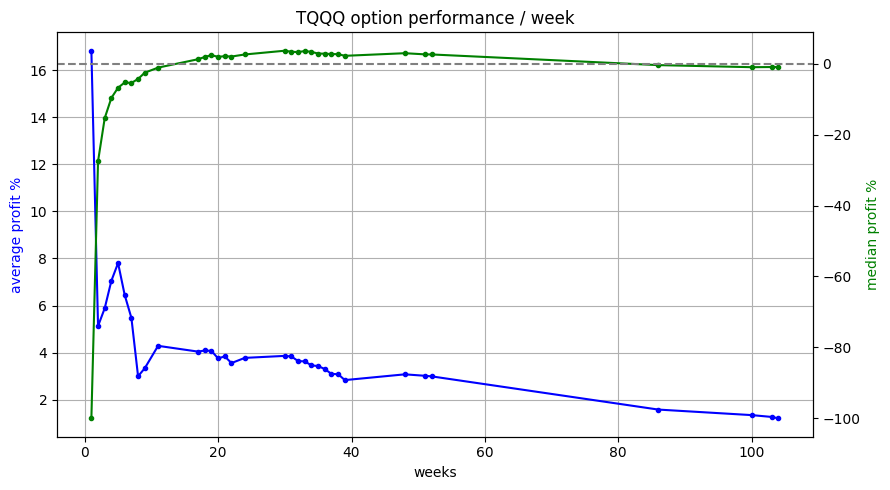

In [28]:
option_weeks = [p[0] for p in option_performance]
option_profit = [p[1] for p in option_performance]
option_positive = [p[2] for p in option_performance]
median_profit = [p[3] for p in option_performance]
option_score = [x * y / 100 for x, y in zip(option_profit, option_positive)]

fig, ax1 = plt.subplots(figsize=(9, 5))

ax2 = ax1.twinx()

ax1.plot(option_weeks, option_profit, label='Average option profit', marker='.', color='b')
ax2.plot(option_weeks, median_profit, label='Median option profit', marker='.', color='g')

ax1.set_title(symbol + ' option performance / week')
ax1.set_xlabel('weeks')
ax1.set_ylabel('average profit %', color='b')
ax2.set_ylabel('median profit %', color='g')
ax2.axhline(y=0, color='grey', linestyle='--')

ax1.grid()

plt.tight_layout()
plt.show()

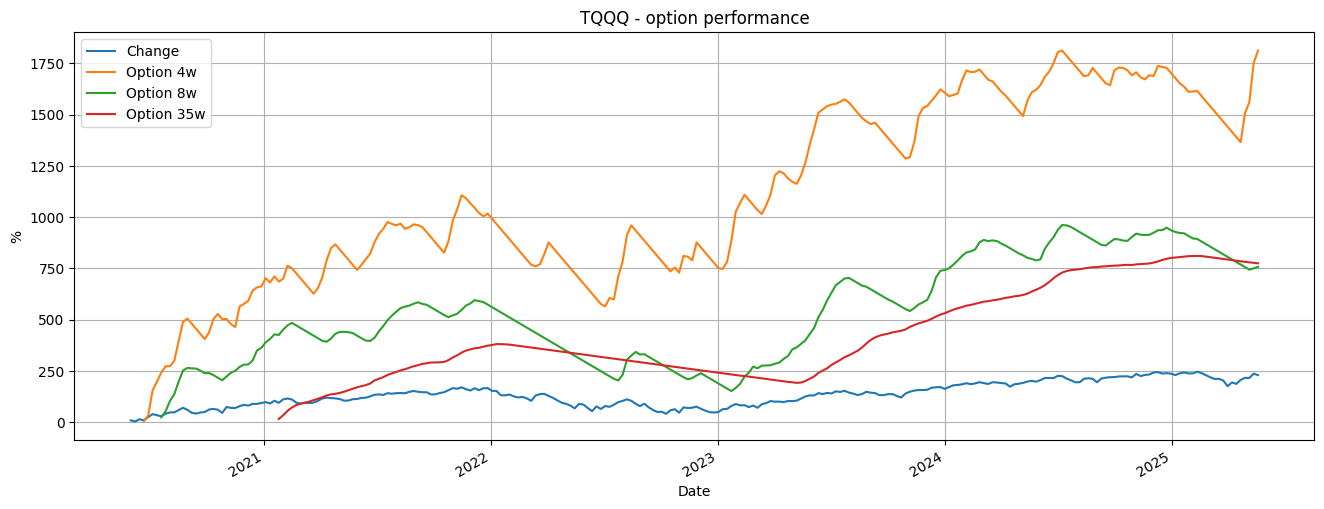

In [32]:
plt.figure(figsize=(16,6))
history['Change'].cumsum().plot()

for w in [4,8,35]:
    (history[f'Option {w}w'].cumsum()/w).plot()

plt.legend(loc='upper left')
plt.title(f'{symbol} - option performance')
plt.ylabel('%')
# plt.yscale('log')
plt.grid()
plt.show()


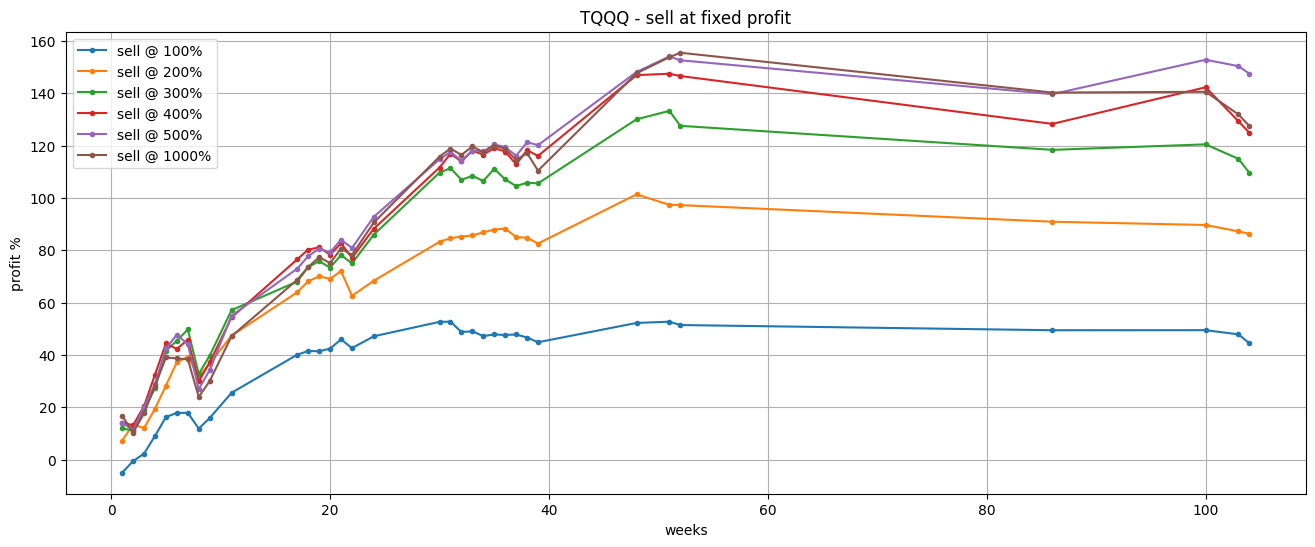

In [30]:
plt.figure(figsize=(16,6))

for maxprofit in [100,200,300,400,500,1000]:
    data = {}
    for weeks in option_leverage:
        lvr = option_leverage[weeks]
        WStart = history.Close.shift(weeks)
        WHigh = history.High.rolling(window=weeks).max()
        eow_profit = (((history.Close / WStart - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
        wmax_profit = (((WHigh / WStart - 1) * 100 - gap) * lvr - 100).clip(upper=maxprofit)
        profit = wmax_profit.where(wmax_profit >= maxprofit, eow_profit)
        data[weeks] = profit[weeks:].mean()

    plt.plot(*zip(*sorted(data.items())), label=f'sell @ {maxprofit}%', marker='.')

plt.legend()
plt.title(f'{symbol} - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

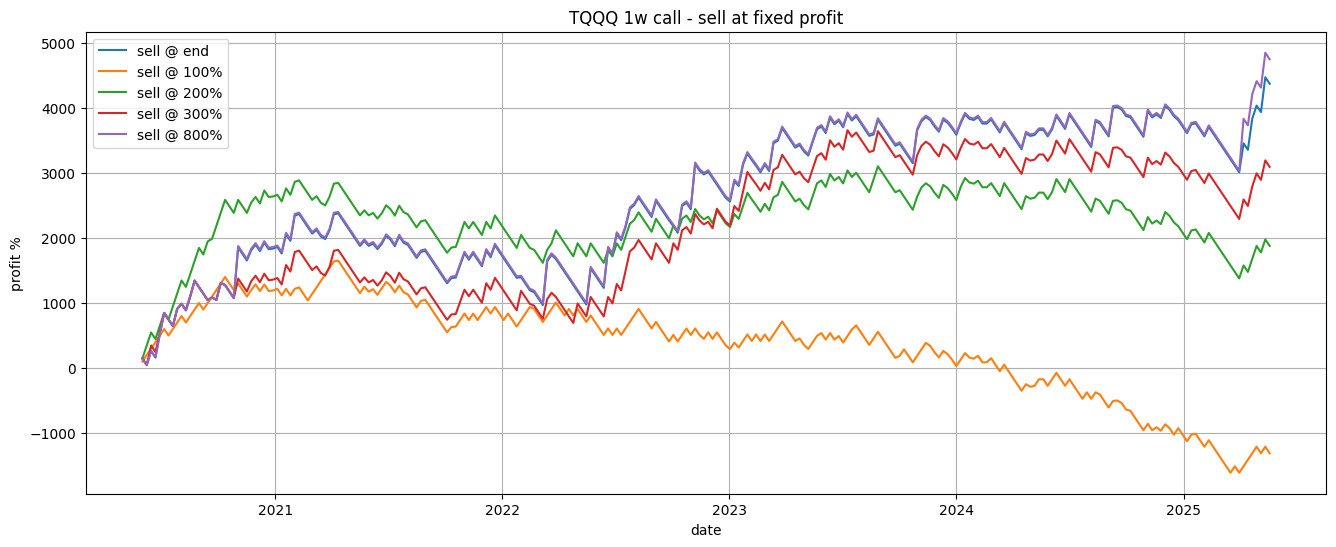

In [31]:
plt.figure(figsize=(16,6))

weeks = 1
lvr = option_leverage[weeks]
WStart = history.Close.shift(weeks)
WHigh = history.High.rolling(window=weeks).max()
eow_profit = (((history.Close / WStart - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
wmax_profit = (((WHigh / WStart - 1) * 100 - gap) * lvr - 100)
plt.plot(eow_profit.cumsum(), label=f'sell @ end')

df = pd.DataFrame({
    'WStart': WStart,
    'WHigh': WHigh,
    'WEnd': history.Close,
    'eow_profit': eow_profit, 
    'wmax_profit': wmax_profit
})

for maxprofit in [100,200,300,800]:
    wmax_clip = wmax_profit.clip(upper=maxprofit)
    profit = wmax_clip.where(wmax_clip >= maxprofit, eow_profit)
    df[f'profit @ {maxprofit}'] = profit

    plt.plot(profit.cumsum(), label=f'sell @ {maxprofit}%')

plt.legend()
plt.title(f'{symbol} {weeks}w call - sell at fixed profit')
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()
plt.show()